# GSVA tutorial

Following the vignette of package "GSVA", at first, create a expression matrix with 30 samples and 20,000 genes and 100 putative gene sets. And then we can test the distribution of GSVA scores of the 100 gene sets in the 30 samples.

In [1]:
# source("http://www.bioconductor.org/biocLite.R")
# biocLite("GSVAdata")
# biocLite("GSVA")

[1] 20000    30

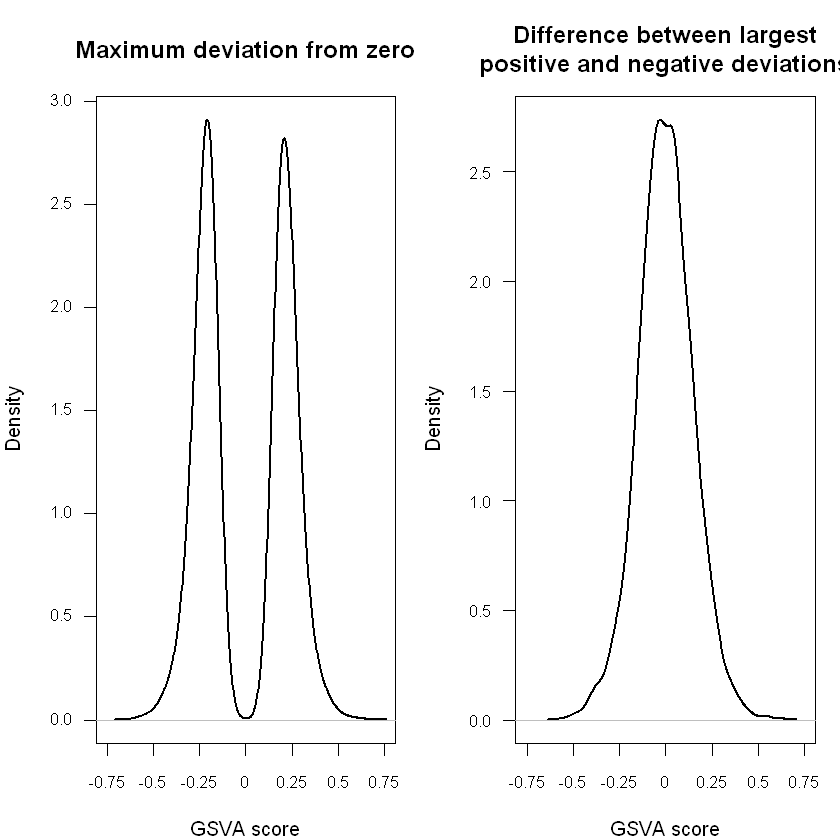

In [2]:
library(GSVA)
p <- 20000     ## number of genes
n <- 30        ## number of samples
nGS <- 100     ## number of gene sets
min.sz <- 10   ## minimum gene set size
max.sz <- 100  ## maximum gene set size

X <- matrix(rnorm(p*n), nrow=p, dimnames=list(1:p, 1:n))
dim(X)

gs <- as.list(sample(min.sz:max.sz, size=nGS, replace=TRUE))             ## sample gene set sizes
gs <- lapply(gs, function(n, p) sample(1:p, size=n, replace=FALSE), p)   ## sample gene sets
es.max <- gsva(X, gs, mx.diff=FALSE, verbose=FALSE, parallel.sz=1)       ## Gaussian
es.dif <- gsva(X, gs, mx.diff=TRUE, verbose=FALSE, parallel.sz=1)        ## Binomial Distribution
par(mfrow=c(1,2), mar=c(4, 4, 4, 1))
plot(density(as.vector(es.max)), main="Maximum deviation from zero",
     xlab="GSVA score", lwd=2, las=1, xaxt="n", xlim=c(-0.75, 0.75), cex.axis=0.8)
axis(1, at=seq(-0.75, 0.75, by=0.25), labels=seq(-0.75, 0.75, by=0.25), cex.axis=0.8)
plot(density(as.vector(es.dif)), main="Difference between largest\npositive and negative deviations",
     xlab="GSVA score", lwd=2, las=1, xaxt="n", xlim=c(-0.75, 0.75), cex.axis=0.8)
axis(1, at=seq(-0.75, 0.75, by=0.25), labels=seq(-0.75, 0.75, by=0.25), cex.axis=0.8)

In [3]:
class(X)

[1] "matrix"

In [4]:
class(gs)

[1] "list"

In [5]:
es.max <- gsva(X, gs, mx.diff=FALSE, verbose=FALSE, parallel.sz=1, method = "ssgsea")

In [6]:
head(es.max)

1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0.12972210,0.17825821,0.03052325,0.11458951,0.11560416,0.21700705,0.1392151,0.08504499,0.23292938,0.12147634,...,0.053110278,0.14897198,0.1857258,0.14407841,0.12337265,0.11575393,0.13242640,0.18653136,0.0728224,0.22221971
0.15471245,0.11869082,0.01329682,0.08037018,0.13201373,0.01224744,0.1579809,0.22084834,0.20429214,0.05857961,...,0.337349385,0.10881421,0.2348077,0.06195241,0.19015227,0.07711914,0.26471462,0.36078252,0.1786417,0.13546964
0.07005947,0.17639605,0.13107195,0.23345879,0.04142051,0.24508584,0.2028711,0.22154764,0.02940494,0.11438792,...,0.219012424,0.04843288,0.1731649,0.13856084,0.28296540,0.10701903,0.06804127,0.11527275,0.1749199,0.09130802
0.08642860,0.06416653,0.16033025,0.05988035,0.05586015,0.06189744,0.1682426,0.03463700,0.18192644,0.10355778,...,-0.002992986,0.21881518,0.2208311,0.17851550,0.04758877,0.22169691,0.08880303,0.21043658,0.1164128,0.09602819
0.14049004,0.13863196,0.13227315,0.22808779,0.28528728,0.20411461,0.2248195,0.10616688,0.18952171,0.16908350,...,0.002595374,0.30136676,0.2223339,0.13546984,0.12815282,0.22113786,0.05042420,0.06095951,0.1061072,0.28667166
0.07387765,0.20936526,0.16101020,0.04627117,0.06512820,0.10414896,0.1542578,0.11398741,0.25570414,0.03211639,...,0.035201130,0.04251549,0.1296403,0.24834571,-0.01372922,0.24472214,0.12828220,0.18777872,0.1608058,0.07167063


In [7]:
es.max.gsva <- gsva(X, gs, mx.diff=FALSE, verbose=FALSE, parallel.sz=1)
head(es.max.gsva)

1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
-0.1464877,0.1706972,-0.2482531,-0.1766762,-0.1435620,0.2095703,-0.1551247,-0.1577420,0.2295833,-0.2017547,...,-0.2316386,0.1597574,0.2004513,-0.1711852,-0.1726612,-0.1842517,-0.1703832,0.1764832,-0.1638436,0.1890542
-0.1693964,-0.2393881,-0.2107787,-0.2047501,0.1318724,-0.2117271,0.1475764,0.1925819,0.2088948,-0.2230314,...,0.3858626,-0.1646672,0.2306498,-0.1787025,-0.1931199,-0.2237809,0.2377592,0.3294455,0.2331393,-0.1851846
-0.2210154,0.1855599,-0.2096997,0.2218754,-0.2072355,0.2305601,0.2399279,0.2134264,-0.2398134,-0.2048876,...,0.2372254,-0.2126249,-0.1844181,0.1771461,0.2049809,0.1378593,-0.1963704,-0.1492016,0.1981473,-0.2233850
-0.1751456,-0.2237125,0.2175701,-0.1457915,-0.2178851,-0.2758716,0.2026401,-0.2813152,0.1870755,0.1781394,...,-0.1817764,0.2741443,0.2092358,-0.1615397,-0.1819020,0.2171130,-0.1543882,0.1876708,0.1312551,-0.2170385
-0.2034761,0.1274539,0.1623424,0.2147193,0.2414300,0.1936976,0.2106893,-0.1884508,0.1919588,0.1620128,...,-0.2542940,0.2441941,0.1899590,-0.1560990,0.2024308,0.2081195,-0.2478326,-0.1480540,-0.1278227,0.2684894
-0.1848801,0.2476444,0.1990156,-0.1346921,-0.1994623,-0.1519222,0.1869785,-0.1648234,0.2481611,-0.2237861,...,-0.1296029,-0.1962616,-0.1679251,0.1804999,-0.2825748,0.2556762,0.1560468,-0.2425081,0.1850301,-0.2051621


Although the GSVA algorithm itself does not evaluate statistical significance for the enrichment of gene sets, significance with respect to one or more phenotypes can be easily evaluated using conventional statistical models. Likewise, false discovery rates can be estimated by permuting the sample labels (Methods). Examples of these techniques are provided in the following section.

## Application

* Functional enrichment between two subtypes of leukemia 两种白血病亚型之间的功能富集
* Identification of molecular signatures in distinct glioblastoma subtypes.鉴定不同胶质母细胞瘤亚型中的分子特征。
   
Via this vignette, we will use the C2 collection of curated gene sets that form part of the Molecular Signatures Database (MSigDB)(http://software.broadinstitute.org/gsea/msigdb/collections.jsp#C2). This particular collection of gene sets is provided as a `GeneSetCollection` object called `c2BroadSets` in the accompanying experimental data package `GSVAdata`, which stores these and other data employed in this vignette.   

The data set we use in "Function enrichment" corresponds to the microarray data from (Armstrong et al.,2002) which consists of 37 different individuals with human acute leukemia, where 20 of them have conventional childhood acute lymphoblastic leukemia (ALL) and the other 17 are affected with the MLL (mixed-lineage leukemia gene) translocation. This leukemia data set is stored as an `ExpressionSet` object called leukemia in the `GSVAdata` package and details on how the data was pre-processed can be found in the corresponding help page. Enclosed with the `RMA` expression values we provide some metadata including the main phenotype corresponding to the leukemia sample subtype.

In [9]:
library(GSEABase)
library(GSVAdata) 
data(c2BroadSets)
c2BroadSets     # `c2BroadSets` contains 3272 gene sets(pathways)
head(names(c2BroadSets))
c2BroadSets[[names(c2BroadSets)[1]]]

GeneSetCollection
  names: NAKAMURA_CANCER_MICROENVIRONMENT_UP, NAKAMURA_CANCER_MICROENVIRONMENT_DN, ..., ST_PHOSPHOINOSITIDE_3_KINASE_PATHWAY (3272 total)
  unique identifiers: 5167, 100288400, ..., 57191 (29340 total)
  types in collection:
    geneIdType: EntrezIdentifier (1 total)
    collectionType: BroadCollection (1 total)

[1] "NAKAMURA_CANCER_MICROENVIRONMENT_UP" 
[2] "NAKAMURA_CANCER_MICROENVIRONMENT_DN" 
[3] "WEST_ADRENOCORTICAL_TUMOR_MARKERS_UP"
[4] "WEST_ADRENOCORTICAL_TUMOR_MARKERS_DN"
[5] "WINTER_HYPOXIA_UP"                   
[6] "WINTER_HYPOXIA_DN"

setName: NAKAMURA_CANCER_MICROENVIRONMENT_UP 
geneIds: 5167, 100288400, ..., 3046 (total: 26)
geneIdType: EntrezId
collectionType: Broad
  bcCategory: c2 (Curated)
  bcSubCategory: NA
details: use 'details(object)'

In [11]:
# biocLite(c("genefilter", "limma"))
library(Biobase)
library(genefilter)
library(limma)
library(RColorBrewer)

# employ the `cache()` function from the Biobase package 
# in order to load some pre-computed results and speed up the building time of the vignette 
cacheDir <- system.file("extdata", package="GSVA")
cachePrefix <- "cache4vignette_"
file.remove(paste(cacheDir, list.files(cacheDir, pattern=cachePrefix), sep="/"))

# Functional enrichment
# how to identify functionally enriched gene sets between two phenotypes
# we will employ the linear modeling techniques implemented in the limma package to find the enriched gene sets.
data(leukemia)
leukemia_eset
head(pData(leukemia_eset))
table(leukemia_eset$subtype)

Warning message in file.remove(paste(cacheDir, list.files(cacheDir, pattern = cachePrefix), :
"cannot remove file 'D:/R-3.5.3/library/GSVA/extdata/', reason 'Permission denied'"

[1] FALSE

ExpressionSet (storageMode: lockedEnvironment)
assayData: 12626 features, 37 samples 
  element names: exprs 
protocolData
  sampleNames: CL2001011101AA.CEL CL2001011102AA.CEL ...
    CL2001011152AA.CEL (37 total)
  varLabels: ScanDate
  varMetadata: labelDescription
phenoData
  sampleNames: CL2001011101AA.CEL CL2001011102AA.CEL ...
    CL2001011152AA.CEL (37 total)
  varLabels: subtype
  varMetadata: labelDescription channel
featureData: none
experimentData: use 'experimentData(object)'
Annotation: hgu95a 

,subtype
,<chr>
CL2001011101AA.CEL,ALL
CL2001011102AA.CEL,ALL
CL2001011104AA.CEL,ALL
CL2001011105AA.CEL,ALL
CL2001011109AA.CEL,ALL
CL2001011110AA.CEL,ALL



ALL MLL 
 20  17 

In [12]:
# examine the variability of the expression profiles across samples by plotting the cumulative distribution
# of IQR values as shown in Figure 2. About 50% of the probesets show very limited variability across samples 
# and, therefore, in the following non-specific filtering step we remove this fraction from further analysis.

In [13]:
data <- exprs(leukemia_eset)
head(data)

,CL2001011101AA.CEL,CL2001011102AA.CEL,CL2001011104AA.CEL,CL2001011105AA.CEL,CL2001011109AA.CEL,CL2001011110AA.CEL,CL2001011111AA.CEL,CL2001011112AA.CEL,CL2001011113AA.CEL,CL2001011114AA.CEL,...,CL2001011133AA.CEL,CL2001011138AA.CEL,CL2001011139AA.CEL,CL2001011140AA.CEL,CL2001011142AA.CEL,CL2001011143AA.CEL,CL2001011144AA.CEL,CL2001011146AA.CEL,CL2001011149AA.CEL,CL2001011152AA.CEL
1000_at,11.354426,10.932543,11.185906,11.251631,11.540745,11.469465,11.129466,11.236194,10.896176,10.787843,...,10.998543,11.022275,10.967026,10.841036,11.073689,11.215481,10.741941,11.485294,11.186323,11.030696
1001_at,9.185470,8.823661,8.687186,8.958305,9.762877,8.640798,9.054107,8.538441,8.547110,9.280357,...,8.608648,8.314777,9.085601,8.783277,8.733554,8.942275,8.636595,8.957888,8.997009,8.770168
1002_f_at,7.806993,8.127591,7.842353,8.319227,8.334177,8.224817,8.059581,7.858845,7.878801,8.084978,...,8.165846,8.035025,8.176339,8.319010,8.227376,8.133201,8.360069,8.333318,7.827597,7.898678
1003_s_at,10.164370,10.048514,10.006014,10.474046,10.115543,10.325243,10.056144,9.984708,10.147972,10.108117,...,10.120300,10.054734,10.265817,9.973678,10.406810,10.496098,10.475986,10.496269,10.223245,10.083038
1004_at,9.642389,9.834265,9.750938,10.430205,10.066628,10.214062,9.921978,9.785324,9.861064,9.692341,...,9.905051,9.689294,9.847789,9.756353,9.926914,10.064015,10.290954,9.942519,10.118811,9.745055
1005_at,13.717107,14.469777,13.713944,13.415991,13.369767,12.751648,11.246510,12.122904,11.666802,10.069415,...,13.252895,13.890406,12.205873,14.188979,12.332333,12.774179,10.428951,13.211033,13.038051,13.501561


We carry out a non-specific filtering step by discarding the 50% of the probesets with smaller variability, probesets without Entrez ID annotation, probesets whose associated Entrez ID is duplicated in the annotation, and Affymetrix quality control probes:

In [14]:
filtered_eset <- nsFilter(leukemia_eset, require.entrez=TRUE, 
                          remove.dupEntrez=TRUE,
                          var.func=IQR, var.filter=TRUE, 
                          var.cutoff=0.5, filterByQuantile=TRUE,
                          feature.exclude="^AFFX")
filtered_eset
leukemia_filtered_eset <- filtered_eset$eset
leukemia_filtered_eset
exprs(leukemia_filtered_eset)[1:4,1:4]

$eset
ExpressionSet (storageMode: lockedEnvironment)
assayData: 4292 features, 37 samples 
  element names: exprs 
protocolData
  sampleNames: CL2001011101AA.CEL CL2001011102AA.CEL ...
    CL2001011152AA.CEL (37 total)
  varLabels: ScanDate
  varMetadata: labelDescription
phenoData
  sampleNames: CL2001011101AA.CEL CL2001011102AA.CEL ...
    CL2001011152AA.CEL (37 total)
  varLabels: subtype
  varMetadata: labelDescription channel
featureData: none
experimentData: use 'experimentData(object)'
Annotation: hgu95a 

$filter.log
$filter.log$numDupsRemoved
[1] 2857

$filter.log$numLowVar
[1] 4292

$filter.log$numRemoved.ENTREZID
[1] 1166

$filter.log$feature.exclude
[1] 19



ExpressionSet (storageMode: lockedEnvironment)
assayData: 4292 features, 37 samples 
  element names: exprs 
protocolData
  sampleNames: CL2001011101AA.CEL CL2001011102AA.CEL ...
    CL2001011152AA.CEL (37 total)
  varLabels: ScanDate
  varMetadata: labelDescription
phenoData
  sampleNames: CL2001011101AA.CEL CL2001011102AA.CEL ...
    CL2001011152AA.CEL (37 total)
  varLabels: subtype
  varMetadata: labelDescription channel
featureData: none
experimentData: use 'experimentData(object)'
Annotation: hgu95a 

,CL2001011101AA.CEL,CL2001011102AA.CEL,CL2001011104AA.CEL,CL2001011105AA.CEL
907_at,11.85752,11.161085,11.512466,10.185201
35430_at,10.32803,9.494069,9.012711,10.282458
36841_at,9.59156,9.820928,9.347952,9.616633
38924_s_at,12.41735,11.706729,12.392675,12.842632


The calculation of GSVA enrichment scores is performed in one single call to the `gsva()` function. However, one should take into account that this function performs further non-specific filtering steps prior to the actual calculations. On the one hand, it matches gene identifiers between gene sets and gene expression values. On the other hand, it discards gene sets that do not meet minimum and maximum gene set size requirements specified with the arguments min.sz and max.sz, respectively, which, in the call below, are set to 10 and 500 genes. Because we want to use limma on the resulting GSVA enrichment scores, we leave deliberately unchanged the default argument mx.diff=TRUE to obtain approximately normally distributed ES.  

In [15]:
c2BroadSets

GeneSetCollection
  names: NAKAMURA_CANCER_MICROENVIRONMENT_UP, NAKAMURA_CANCER_MICROENVIRONMENT_DN, ..., ST_PHOSPHOINOSITIDE_3_KINASE_PATHWAY (3272 total)
  unique identifiers: 5167, 100288400, ..., 57191 (29340 total)
  types in collection:
    geneIdType: EntrezIdentifier (1 total)
    collectionType: BroadCollection (1 total)

In [16]:
cache(leukemia_es <- gsva(leukemia_filtered_eset, c2BroadSets, min.sz=10, max.sz=500, verbose=TRUE),
                          dir=cacheDir, prefix=cachePrefix)

Mapping identifiers between gene sets and feature names
Estimating GSVA scores for 2019 gene sets.
Computing observed enrichment scores
Estimating ECDFs with Gaussian kernels
Using parallel with 8 cores
  |======================================================================| 100%


In [17]:
leukemia_es

ExpressionSet (storageMode: lockedEnvironment)
assayData: 2019 features, 37 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: CL2001011101AA.CEL CL2001011102AA.CEL ...
    CL2001011152AA.CEL (37 total)
  varLabels: subtype
  varMetadata: labelDescription channel
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

In [18]:
leukemia_es$subtype
experimentData(leukemia_es)

[1] "ALL" "ALL" "ALL" "ALL" "ALL" "ALL" "ALL" "ALL" "ALL" "ALL" "ALL" "ALL"
[13] "ALL" "ALL" "ALL" "ALL" "ALL" "ALL" "ALL" "ALL" "MLL" "MLL" "MLL" "MLL"
[25] "MLL" "MLL" "MLL" "MLL" "MLL" "MLL" "MLL" "MLL" "MLL" "MLL" "MLL" "MLL"
[37] "MLL"

Experiment data
  Experimenter name:  
  Laboratory:  
  Contact information:  
  Title:  
  URL:  
  PMIDs:  
  No abstract available.
  Information is available on: preprocessing 
  notes:
   :     
      

We test whether there is a difference between the GSVA enrichment scores from each pair of phenotypes
using a simple linear model and moderated t-statistics computed by the limma package using an empirical
Bayes shrinkage method (see Smyth, 2004). We are going to examine both, changes at gene level and
changes at pathway level and since, as we shall see below, there are plenty of them, we are going to
employ the following stringent cut-offs to attain a high level of statistical and biological significance:

In [19]:
adjPvalueCutoff <- 0.001
logFCcutoff <- log2(2)

# where we will use the latter only for the gene-level differential expression analysis
design <- model.matrix(~ factor(leukemia_es$subtype))
colnames(design) <- c("ALL", "MLLvsALL")
fit <- lmFit(leukemia_es, design)
fit <- eBayes(fit)
allGeneSets <- topTable(fit, coef="MLLvsALL", number=Inf)
DEgeneSets <- topTable(fit, coef="MLLvsALL", number=Inf,
                       p.value=adjPvalueCutoff, adjust="BH")
res <- decideTests(fit, p.value=adjPvalueCutoff)
summary(res)
# Thus, there are 38 MSigDB C2 curated pathways that are differentially activated between MLL and ALL
# at 0.1% FDR. When we carry out the corresponding differential expression analysis at gene level

        ALL MLLvsALL
Down      3        8
NotSig 2015     1981
Up        1       30

In [20]:
head(res)

,ALL,MLLvsALL
NAKAMURA_CANCER_MICROENVIRONMENT_DN,0,0
WINTER_HYPOXIA_UP,0,0
WINTER_HYPOXIA_DN,0,0
PARENT_MTOR_SIGNALING_UP,0,0
PARENT_MTOR_SIGNALING_DN,0,0
PYEON_HPV_POSITIVE_TUMORS_UP,0,0


In [21]:
logFCcutoff <- log2(2)
design <- model.matrix(~ factor(leukemia_eset$subtype))
colnames(design) <- c("ALL", "MLLvsALL")
fit <- lmFit(leukemia_filtered_eset, design)
fit <- eBayes(fit)
allGenes <- topTable(fit, coef="MLLvsALL", number=Inf)
DEgenes <- topTable(fit, coef="MLLvsALL", number=Inf,
                    p.value=adjPvalueCutoff, adjust="BH", lfc=logFCcutoff)
res <- decideTests(fit, p.value=adjPvalueCutoff, lfc=logFCcutoff)
summary(res)
# Here, 122 genes show up as being differentially expressed with a minimum fold-change of 2 at 0.1% FDR.
# the genes and pathways that are changing by means of volcano plots

        ALL MLLvsALL
Down      0       71
NotSig    0     4170
Up     4292       51

In [22]:
head(res)

,ALL,MLLvsALL
907_at,1,0
35430_at,1,0
36841_at,1,0
38924_s_at,1,0
36023_at,1,0
191_at,1,0


In [23]:
head(allGenes)
head(allGeneSets)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
33412_at,4.617705,12.095415,13.27409,4.461265e-16,1.914775e-12,26.17560
1389_at,-2.210631,13.028410,-12.74232,1.648683e-15,3.538074e-12,24.94787
40763_at,2.513625,7.550442,12.36905,4.212267e-15,6.026351e-12,24.06329
1914_at,3.589658,9.202718,11.85161,1.591002e-14,1.707146e-11,22.80535
38906_at,-2.412379,9.198476,-10.54469,5.314645e-13,4.562092e-10,19.46054
37280_at,-3.507887,10.506362,-10.16623,1.529975e-12,1.094442e-09,18.44668


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ROSS_LEUKEMIA_WITH_MLL_FUSIONS,0.7671828,-0.0054222201,17.188092,9.267808e-21,1.871170e-17,35.83274
VALK_AML_CLUSTER_16,0.7245398,-0.0420213311,10.219666,5.030864e-13,5.078657e-10,19.42047
ROSS_AML_WITH_MLL_FUSIONS,0.5685124,-0.0029793450,9.669421,2.649910e-12,1.783390e-09,17.83844
HADDAD_B_LYMPHOCYTE_PROGENITOR,-0.5474778,0.0014186843,-9.270150,9.059430e-12,4.572747e-09,16.66442
MULLIGHAN_MLL_SIGNATURE_1_UP,0.4571891,0.0028069540,7.816637,9.271864e-10,3.743979e-07,12.22284
MULLIGHAN_MLL_SIGNATURE_2_UP,0.4504017,0.0008110401,7.676504,1.464772e-09,4.928958e-07,11.78262


In [24]:
# biocLite("ggplot2")
library(ggplot2) 

## 火山图

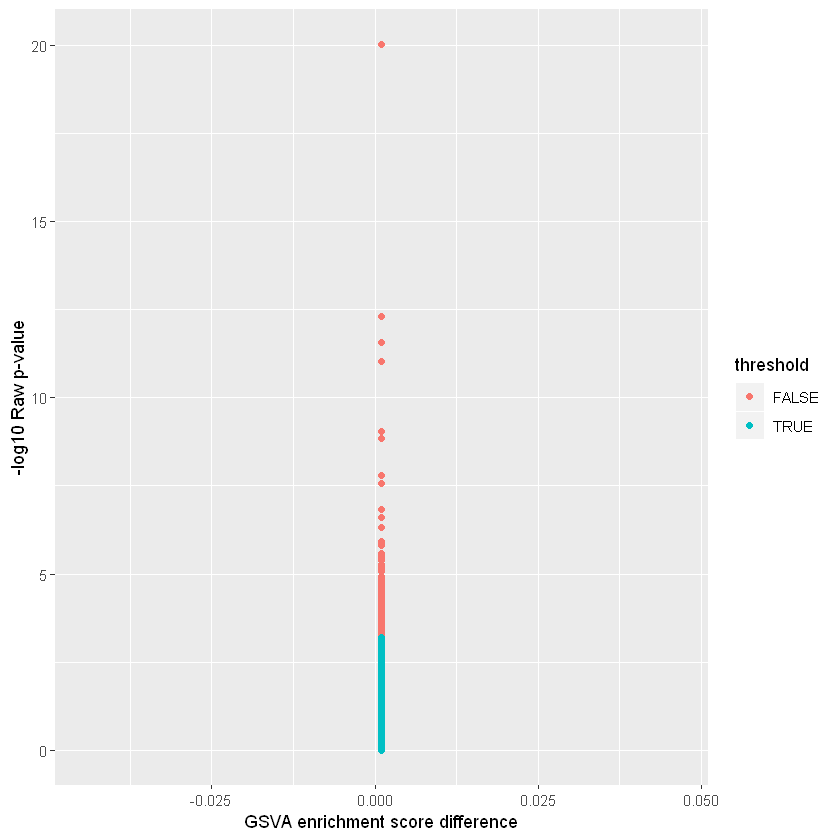

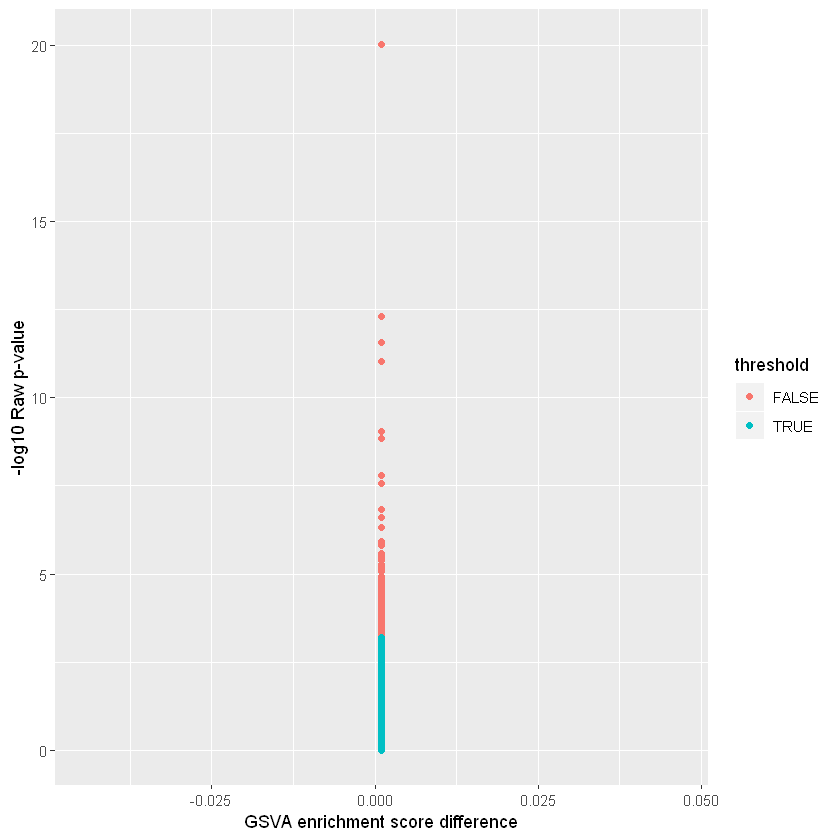

In [25]:
par(mfrow=c(2,2))
threshold <- as.factor((allGeneSets$adj.P.Val>0.01 ))
ggplot(allGeneSets, aes(x= adjPvalueCutoff ,
          y= -1*log10(allGeneSets$P.Value),colour = threshold))+xlab("GSVA enrichment score difference")+ylab("-log10 Raw p-value")+geom_point()

threshold2 <- as.factor((allGenes$logFC>2|allGenes$logFC<(-2)&allGenes$adj.P.Val>0.01 ))
ggplot(allGeneSets, aes(x= adjPvalueCutoff ,
          y= -1*log10(allGeneSets$P.Value),colour = threshold))+xlab("GSVA enrichment score difference")+ylab("-log10 Raw p-value")+geom_point()

# 热图


The signatures of both, the differentially activated pathways reported by the GSVA analysis and of the differentially expressed genes are shown in Figures 4 and 5, respectively. Many of the gene sets and pathways reported in Figure 4 are directly related to ALL and MLL.


Attaching package: 'gplots'

The following object is masked from 'package:IRanges':

    space

The following object is masked from 'package:S4Vectors':

    space

The following object is masked from 'package:stats':

    lowess



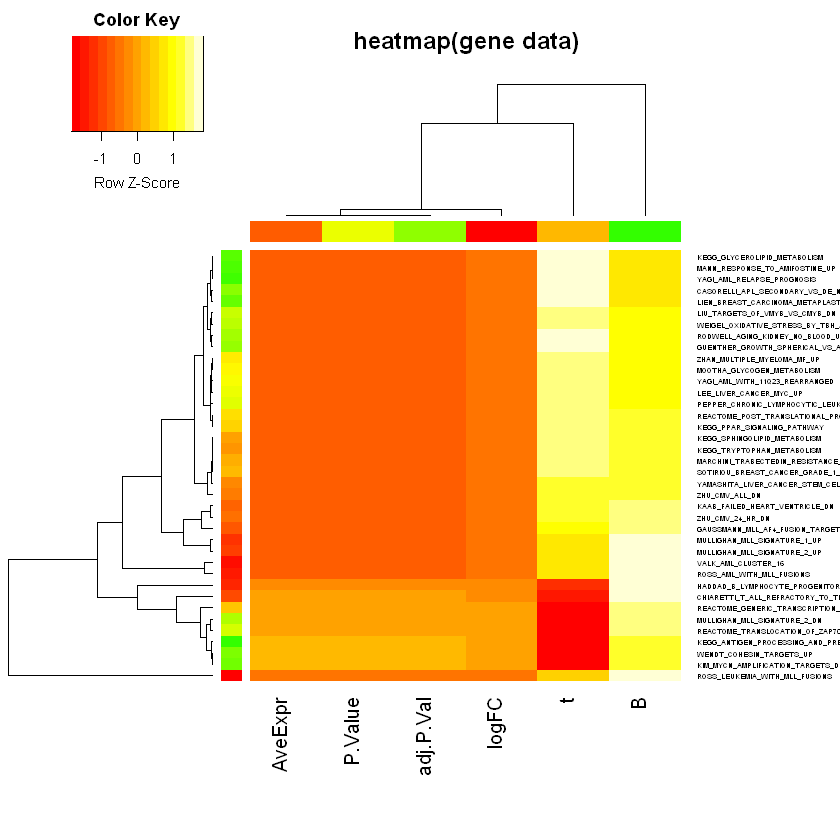

In [26]:
library(gplots)
DEgeneSets <- as.matrix(DEgeneSets)
rc <- rainbow(nrow(DEgeneSets), start = 0, end = .3)
cc <- rainbow(ncol(DEgeneSets), start = 0, end = .3)
heatmap.2(DEgeneSets, RowSideColors = rc, ColSideColors=cc, scale= "row",
          margins = c(10,10), key=TRUE, symkey=FALSE, density.info="none", trace="none", 
          cexRow=0.5, main = "heatmap(gene data)")

## Molecular signature identification

In (Verhaak et al., 2010) four subtypes of Glioblastoma multiforme (GBM) - proneural, classical, neural and mesenchymal - were identified by the characterization of distinct gene-level expression patterns. Using eight gene set signatures specific to brain cell types - astrocytes, oligodendrocytes, neurons and cultured astroglial cells - derived from murine models by (Cahoy et al., 2008), we replicate the analysis of (Verhaak et al., 2010) by employing GSVA to transform the gene expression measurements into enrichment scores for these eight gene sets, without taking the sample subtype grouping into account. We start by loading and have a quick glance to the data which forms part of the GSVAdata package:

In [27]:
data(gbm_VerhaakEtAl)
gbm_eset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 11861 features, 173 samples 
  element names: exprs 
protocolData: none
phenoData
  rowNames: TCGA.02.0003.01A.01 TCGA.02.0010.01A.01 ...
    TCGA.12.0620.01A.01 (173 total)
  varLabels: subtype
  varMetadata: labelDescription channel
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

In [28]:
head(featureNames(gbm_eset))
table(gbm_eset$subtype)
data(brainTxDbSets)
sapply(brainTxDbSets, length)
lapply(brainTxDbSets, head)

[1] "AACS"    "FSTL1"   "ELMO2"   "CREB3L1" "RPS11"   "PNMA1"


  Classical Mesenchymal      Neural   Proneural 
         38          56          26          53 

astrocytic_up       astrocytic_dn        astroglia_up        astroglia_dn 
                 85                  15                  88                  12 
        neuronal_up         neuronal_dn oligodendrocytic_up oligodendrocytic_dn 
                 98                  30                  70                  30

$astrocytic_up
[1] "GRHL1"   "GPAM"    "PAPSS2"  "MERTK"   "BTG1"    "SLC46A1"

$astrocytic_dn
[1] "NPAL3"  "ATP1A1" "FRMD5"  "ASNS"   "SEMA3E" "LPGAT1"

$astroglia_up
[1] "BST2"     "SERPING1" "ACTA2"    "C9orf167" "C1orf31"  "ANXA4"   

$astroglia_dn
[1] "PCDH8"   "ATP8A1"  "PHACTR3" "PCDH17"  "CCDC28B" "TDG"    

$neuronal_up
[1] "STXBP1"  "JPH4"    "CACNG3"  "BRUNOL6" "CLSTN2"  "FAM123C"

$neuronal_dn
[1] "DKK3"    "LPHN2"   "AHR"     "NRP1"    "MAP3K15" "GALNTL4"

$oligodendrocytic_up
[1] "DCT"    "ZNF536" "GNG8"   "ELOVL6" "NR2C1"  "RCBTB1"

$oligodendrocytic_dn
[1] "DKK3"    "LPHN2"   "AHR"     "NRP1"    "MAP3K15" "GALNTL4"

In [29]:
# GSVA enrichment scores for the gene sets contained in brainTxDbSets are calculated, in this case using 
# mx.diff=FALSE, as follows:
gbm_es <- gsva(gbm_eset, brainTxDbSets, mx.diff=FALSE, verbose=FALSE, parallel.sz=1)

In [30]:
gbm_es

ExpressionSet (storageMode: lockedEnvironment)
assayData: 8 features, 173 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: TCGA.02.0003.01A.01 TCGA.02.0010.01A.01 ...
    TCGA.12.0620.01A.01 (173 total)
  varLabels: subtype
  varMetadata: labelDescription channel
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

In [31]:
exprs(gbm_es)

,TCGA.02.0003.01A.01,TCGA.02.0010.01A.01,TCGA.02.0011.01B.01,TCGA.02.0014.01A.01,TCGA.02.0024.01B.01,TCGA.02.0026.01B.01,TCGA.02.0028.01A.01,TCGA.02.0046.01A.01,TCGA.02.0047.01A.01,TCGA.02.0048.01A.01,...,TCGA.08.0352.01A.01,TCGA.08.0360.01A.01,TCGA.08.0390.01A.01,TCGA.08.0392.01A.01,TCGA.08.0509.01A.01,TCGA.08.0510.01A.01,TCGA.08.0512.01A.01,TCGA.08.0522.01A.01,TCGA.12.0619.01A.01,TCGA.12.0620.01A.01
astrocytic_up,-0.3047539,-0.2946860,-0.1834593,-0.5442776,-0.2834175,-0.2788147,-0.3003514,-0.2874994,0.2607199,0.1413387,...,0.2019316,-0.2041700,-0.1508235,-0.2519564,0.1867464,-0.1965190,0.2585439,-0.3990271,-0.3061357,0.1651281
astrocytic_dn,0.4826236,0.3376643,0.5359332,0.2313235,0.5288826,0.3517722,0.4710344,0.4910108,0.2764851,0.4324623,...,-0.2923986,-0.1946198,0.4439713,0.3662391,-0.3339890,0.3407512,-0.4259364,-0.2728686,0.2719858,-0.3141649
astroglia_up,-0.5149583,-0.5410770,-0.4707559,-0.6113382,-0.4302575,-0.3653708,-0.4790737,-0.4724831,0.2019720,-0.5165498,...,0.5054087,0.5478562,0.3711037,0.3050986,0.2872253,0.2808018,0.5497252,0.4051805,0.4516472,0.4085658
astroglia_dn,0.6997045,0.2800310,0.3715328,0.5346043,0.4296702,0.3711177,0.2752453,0.7441342,0.4997432,0.2887397,...,-0.3034214,-0.5751536,-0.6491908,-0.6224524,-0.3649221,0.2833182,-0.7059324,-0.6362752,-0.6414519,-0.2836502
neuronal_up,0.5535049,0.2417091,-0.2419423,-0.1264513,0.5321516,-0.1907802,-0.3594715,0.3119123,0.4301345,-0.1251531,...,0.6340333,-0.4788773,0.5079833,0.1255322,0.2449831,-0.5029271,-0.3891953,-0.3632664,-0.4659142,-0.2670667
neuronal_dn,0.3506679,-0.3598559,0.2762588,-0.4613689,-0.2785617,-0.3061307,-0.4619156,0.2807331,0.5293801,-0.1936128,...,0.3987708,0.2652174,0.3042433,0.3733822,0.3695670,-0.3555163,0.1917051,-0.2243883,-0.2933334,-0.2151913
oligodendrocytic_up,0.3317492,0.2491713,0.3353197,0.1965032,0.4766178,0.3696743,0.1739008,0.2837137,0.3965796,-0.2499617,...,-0.2932406,-0.2495044,0.2091980,-0.3179201,-0.3245650,-0.2703005,-0.4534530,-0.4265475,-0.4192150,0.1600080
oligodendrocytic_dn,0.3506679,-0.3598559,0.2762588,-0.4613689,-0.2785617,-0.3061307,-0.4619156,0.2807331,0.5293801,-0.1936128,...,0.3987708,0.2652174,0.3042433,0.3733822,0.3695670,-0.3555163,0.1917051,-0.2243883,-0.2933334,-0.2151913


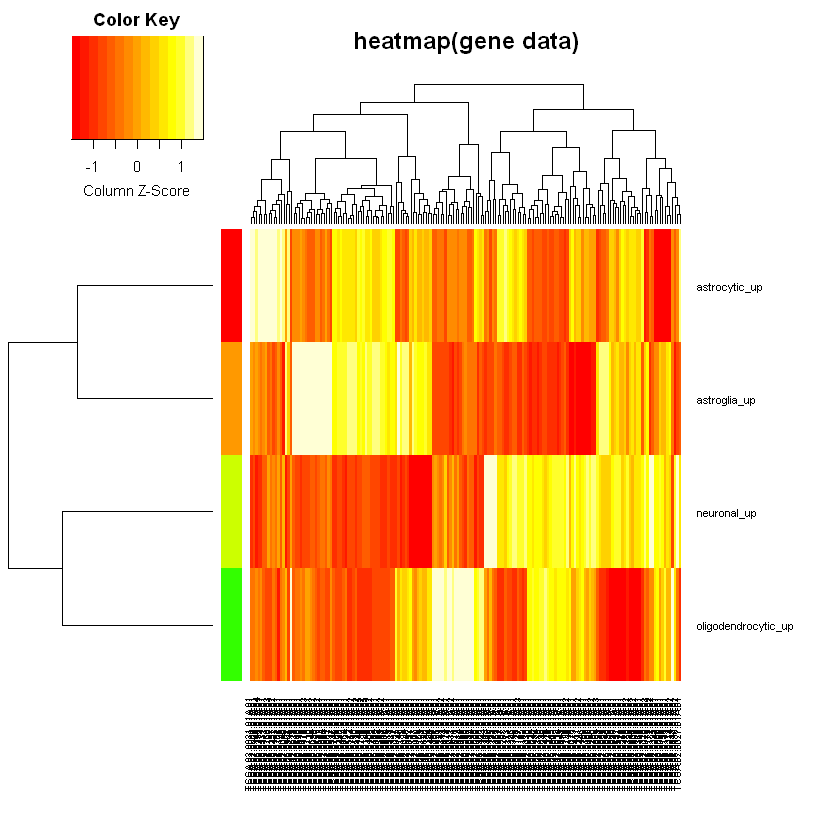

In [32]:
rc <- rainbow(nrow(as.matrix(exprs(gbm_es))[c(1,3,5,7),]), start = 0, end = .3)
# cc <- rainbow(ncol(as.matrix(exprs(gbm_es))[c(1,3,5,7),]), start = 0, end = .3)
heatmap.2(as.matrix(exprs(gbm_es))[c(1,3,5,7),], RowSideColors = rc,  scale= "col", #ColSideColors=cc,
          margins = c(10,10), key=TRUE, symkey=FALSE, density.info="none", trace="none", 
          cexRow=0.8, main = "heatmap(gene data)")

A heatmap shows the GSVA enrichment scores obtained for the up-regulated gene sets across the samples
of the four GBM subtypes. As expected, the neural class is associated with the neural gene set and
the astrocytic gene sets. The mesenchymal subtype is characterized by the expression of mesenchymal
and microglial markers, thus we expect it to correlate with the astroglial gene set. The proneural
subtype shows high expression of oligodendrocytic development genes, thus it is not surprising that the
oligodendrocytic gene set is highly enriched for ths group. Interestingly, the classical group correlates
highly with the astrocytic gene set. In summary, the resulting GSVA enrichment scores recapitulate
accurately the molecular signatures from Verhaak et al. (2010).

## GSVA for RNA-Seq data

we illustrate how to use GSVA with RNA-seq data and, more importantly, how the method provides pathway activity profiles analogous to the ones obtained from microarray data by using samples of lymphoblastoid cell lines (LCL) from HapMap individuals which have been profiled using both technologies Huang et al. (2007); Pickrell et al. (2010). These data form part of the experimental package GSVAdata and the corresponding help pages contain details on how the data were processed. We start loading these data and verifying that they indeed contain expression data for the same genes
and samples, as follows: 

In [33]:
data(commonPickrellHuang)
stopifnot(identical(featureNames(huangArrayRMAnoBatchCommon_eset),
                    featureNames(pickrellCountsArgonneCQNcommon_eset)))
stopifnot(identical(sampleNames(huangArrayRMAnoBatchCommon_eset),
                    sampleNames(pickrellCountsArgonneCQNcommon_eset)))

Next, for the current analysis we use the subset of canonical pathways from the C2 collection of MSigDB Gene Sets. These correspond to the following pathways from KEGG, REACTOME and BIOCARTA:

In [34]:
canonicalC2BroadSets <- c2BroadSets[c(grep("^KEGG", names(c2BroadSets)),
                                      grep("^REACTOME", names(c2BroadSets)),
                                      grep("^BIOCARTA", names(c2BroadSets)))]
canonicalC2BroadSets

GeneSetCollection
  names: KEGG_GLYCOLYSIS_GLUCONEOGENESIS, KEGG_CITRATE_CYCLE_TCA_CYCLE, ..., BIOCARTA_ACTINY_PATHWAY (833 total)
  unique identifiers: 55902, 2645, ..., 8544 (6744 total)
  types in collection:
    geneIdType: EntrezIdentifier (1 total)
    collectionType: BroadCollection (1 total)

In [35]:
#Additionally, we extend this collection of gene sets with two formed by genes with sex-specific expression

data(genderGenesEntrez)
MSY <- GeneSet(msYgenesEntrez, geneIdType=EntrezIdentifier(),
               collectionType=BroadCollection(category="c2"), setName="MSY")
MSY

setName: MSY 
geneIds: 266, 84663, ..., 353513 (total: 34)
geneIdType: EntrezId
collectionType: Broad
  bcCategory: c2 (Curated)
  bcSubCategory: NA
details: use 'details(object)'

In [36]:
XiE <- GeneSet(XiEgenesEntrez, geneIdType=EntrezIdentifier(),
               collectionType=BroadCollection(category="c2"), setName="XiE")
XiE

setName: XiE 
geneIds: 293, 8623, ..., 1121 (total: 66)
geneIdType: EntrezId
collectionType: Broad
  bcCategory: c2 (Curated)
  bcSubCategory: NA
details: use 'details(object)'

In [37]:
canonicalC2BroadSets <- GeneSetCollection(c(canonicalC2BroadSets, MSY, XiE))
canonicalC2BroadSets

GeneSetCollection
  names: KEGG_GLYCOLYSIS_GLUCONEOGENESIS, KEGG_CITRATE_CYCLE_TCA_CYCLE, ..., XiE (835 total)
  unique identifiers: 55902, 2645, ..., 1121 (6810 total)
  types in collection:
    geneIdType: EntrezIdentifier (1 total)
    collectionType: BroadCollection (1 total)

We calculate now GSVA enrichment scores for these gene sets using first the microarray data and then the RNA-seq integer count data. Note that the only requirement to do the latter is to set the argument kcdf="Poisson" which is "Gaussian" by default. Note, however, that if our RNA-seq derived expression levels would be continous, such as log-CPMs, log-RPKMs or log-TPMs, the the default value of the kcdf argument should remain unchanged.

In [38]:
esmicro <- gsva(huangArrayRMAnoBatchCommon_eset, canonicalC2BroadSets, min.sz=5, max.sz=500, 
                mx.diff=TRUE, verbose=FALSE, parallel.sz=1)
dim(esmicro)
esrnaseq <- gsva(pickrellCountsArgonneCQNcommon_eset, canonicalC2BroadSets, min.sz=5, max.sz=500,
                 kcdf="Poisson", mx.diff=TRUE, verbose=FALSE, parallel.sz=1)
dim(esrnaseq)

Features  Samples 
     806       36

Features  Samples 
     806       36

To compare expression values from both technologies we are going to transform the RNA-seq read counts into RPKM values. For this purpose we need gene length and G+C content information also stored in the GSVAdata package and use the cpm() function from the edgeR package. Note that RPKMs can only be calculated for those genes for which the gene length and G+C content information is available:

In [39]:
# biocLite("edgeR")
library(edgeR)
data(annotEntrez220212)
head(annotEntrez220212)

cpm <- cpm(exprs(pickrellCountsArgonneCQNcommon_eset))
dim(cpm)

common <- intersect(rownames(cpm), rownames(annotEntrez220212))
length(common)

rpkm <- sweep(cpm[common, ], 1, annotEntrez220212[common, "Length"] / 10^3, FUN="/")
dim(rpkm)
dim(huangArrayRMAnoBatchCommon_eset[rownames(rpkm), ])

,Length,GCcontent
,<dbl>,<dbl>
1,2301,0.6292916
10,1344,0.3816964
100,2612,0.5153139
1000,4380,0.4502283
10000,7091,0.3989564
100008586,606,0.4339934


[1] 11508    36

[1] 11478

[1] 11478    36

Features  Samples 
   11478       36

We finally calculate Spearman correlations between gene and gene-level expression values and gene set level GSVA enrichment scores produced from data obtained by microarray and RNA-seq technologies:

In [40]:
corsrowsgene <- sapply(1:nrow(huangArrayRMAnoBatchCommon_eset[rownames(rpkm), ]),
                       function(i, expmicro, exprnaseq) cor(expmicro[i, ], exprnaseq[i, ], method="pearson"),
                           exprs(huangArrayRMAnoBatchCommon_eset[rownames(rpkm), ]), log2(rpkm+0.1))
names(corsrowsgene) <- rownames(rpkm)
corsrowsgs <- sapply(1:nrow(esmicro), 
                     function(i, esmicro, esrnaseq) cor(esmicro[i, ], esrnaseq[i, ], method="spearman"),
                         exprs(esmicro), exprs(esrnaseq))
names(corsrowsgs) <- rownames(esmicro)

In [41]:
head(corsrowsgs)

KEGG_GLYCOLYSIS_GLUCONEOGENESIS 
                                   0.16808237 
                 KEGG_CITRATE_CYCLE_TCA_CYCLE 
                                   0.01415701 
               KEGG_PENTOSE_PHOSPHATE_PATHWAY 
                                   0.09806950 
KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS 
                                   0.56447876 
         KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM 
                                  -0.09111969 
                    KEGG_GALACTOSE_METABOLISM 
                                   0.06666667

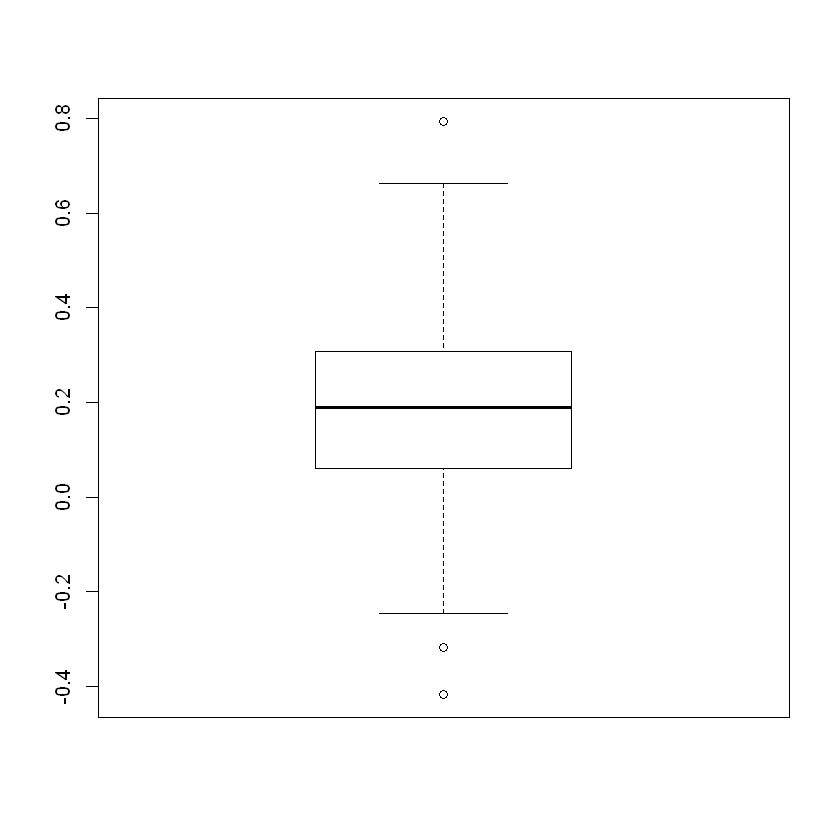

In [42]:
boxplot(corsrowsgs)

In [43]:
sessionInfo()

R version 3.5.3 (2019-03-11)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 17763)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] edgeR_3.22.5         gplots_3.0.1.1       ggplot2_3.1.1       
 [4] RColorBrewer_1.1-2   limma_3.36.5         genefilter_1.62.0   
 [7] GSVAdata_1.18.0      hgu95a.db_3.2.3      org.Hs.eg.db_3.6.0  
[10] GSEABase_1.42.0      graph_1.58.2         annotate_1.58.0     
[13] XML_3.98-1.19        AnnotationDbi_1.42.1 IRanges_2.14.12     
[16] S4Vectors_0.18.3     Biobase_2.40.0       BiocGenerics_0.26.0 
[19] GSVA_1.28.0         

loaded via a namespace (and not attached):
 [1] loc